#This is the examples of Leetcode with Python

## 447. Number of Boomerangs   

You are given n points in the plane that are all distinct, where points[i] = [xi, yi]. A boomerang is a tuple of points (i, j, k) such that the distance between i and j equals the distance between i and k (the order of the tuple matters).

Return the number of boomerangs.

Example 1:

Input: points = [[0,0],[1,0],[2,0]]
Output: 2
Explanation: The two boomerangs are [[1,0],[0,0],[2,0]] and [[1,0],[2,0],[0,0]].

Example 2:

Input: points = [[1,1],[2,2],[3,3]]
Output: 2

Example 3:

Input: points = [[1,1]]
Output: 0

 

Constraints:

    n == points.length
    1 <= n <= 500
    points[i].length == 2
    -104 <= xi, yi <= 104
    All the points are unique.



In [85]:
"""
Create a matrix to calculate the distance of a point to another points
than compare between them to have the same distance
Calculate potential of number then sum
"""

def distance2Point(point1, point2):
    return (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2

print("test distance:", distance2Point([0,2],[0, 0]))  

test distance: 4


In [109]:
"""
return array of same number with input list
"""
def getSameNumber(arr):
    print(arr)
    arr.sort()
    output = []
    lastNumber = 0
    count = 0
    for i in range(len(arr)):
        if lastNumber == arr[i]:
            count += 1
        else:
            if count > 1:
                output.append(count)
            lastNumber = arr[i]
            count = 1
    # Incase of number is the same
    if count > 1:
        output.append(count)
    
    print("Same distance", output)
    return output
print("Same number:", getSameNumber([0,1,1,2,2,3]))

[0, 1, 1, 2, 2, 3]
Same distance [2, 2]
Same number: [2, 2]


In [108]:
def calculationPotential(value):
    result = 1
    for i in range(1, value + 1):
        result *= i
    return result
calculationPotential(4)

24

In [111]:
def numberOfBoomerangs(listPoints):
    count = len(listPoints)
    if count < 3:
        return 0
    
    matrixDistance = [[i for i in range(count)] for j in range(count)]
    sumSameDistance = []
    sumBoomerangs = 0
    for i in range(0, count):
        numSameDistance = 0
        arrDistance = []
        for j in range(0, count):
            matrixDistance[i][j] = distance2Point(listPoints[i], listPoints[j])
            arrDistance.append(matrixDistance[i][j])
        
        arrSameDistance = getSameNumber(arrDistance)
        if len(arrSameDistance) > 0:
            for num in range(0, len(arrSameDistance)):
                sumSameDistance.append(arrSameDistance[num])
                sumBoomerangs += calculationPotential(arrSameDistance[num])
        # for d in range(len(arrDistance)):
            
    print("array same distance", sumSameDistance)
    print("sumBoomerangs: ", sumBoomerangs)

print(numberOfBoomerangs([[1,1]]))
numberOfBoomerangs([[1,1],[2,2],[3,3]])

0
[0, 2, 8]
Same distance []
[2, 0, 2]
Same distance [2]
[8, 2, 0]
Same distance []
array same distance [2]
sumBoomerangs:  2


[0, 1, 4, 1, 4]
Same distance [2, 2]
[1, 0, 1, 4, 9]
Same distance [2]
[4, 1, 0, 9, 16]
Same distance []
[1, 4, 9, 0, 1]
Same distance [2]
[4, 9, 16, 1, 0]
Same distance []
array same distance [2, 2, 2, 2]
sumBoomerangs:  8


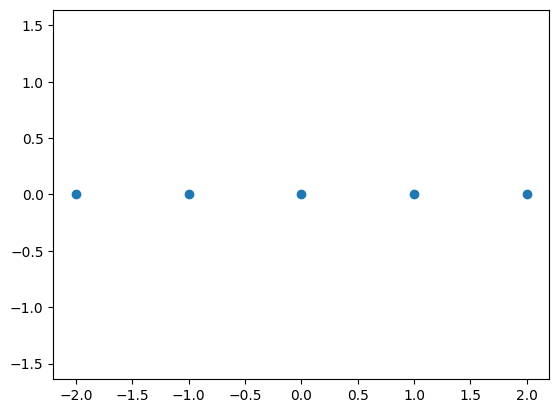

In [103]:
arrTest1 = [[0,0],[1,0],[2,0], [-1,0], [-2,0]]

import matplotlib.pyplot as plt
plt.scatter(*zip(*arrTest1))
plt.axis('equal')
numberOfBoomerangs([[0,0],[1,0],[2,0], [-1,0], [-2,0]])

[0, 2, 4, 1, 1]
Same distance [2]
[2, 0, 2, 5, 1]
Same distance [2]
[4, 2, 0, 9, 1]
Same distance []
[1, 5, 9, 0, 4]
Same distance []
[1, 1, 1, 4, 0]
Same distance [3]
array same distance [2, 2, 3]
sumBoomerangs:  10


(-1.15, 2.15, -0.05, 1.05)

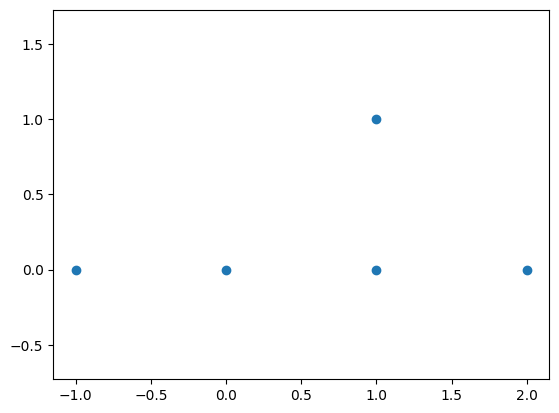

In [104]:
arrTest2 = [[0,0],[1,1],[2,0], [-1,0], [1,0]]
numberOfBoomerangs(arrTest2)
plt.scatter(*zip(*arrTest2))
plt.axis('equal')

[0, 2, 4, 1, 1, 2]
Same distance [2, 2]
[2, 0, 2, 5, 1, 4]
Same distance [2]
[4, 2, 0, 9, 1, 2]
Same distance [2]
[1, 5, 9, 0, 4, 5]
Same distance [2]
[1, 1, 1, 4, 0, 1]
Same distance [4]
[2, 4, 2, 5, 1, 0]
Same distance [2]
array same distance [2, 2, 2, 2, 2, 4, 2]
sumBoomerangs:  36


(-1.15, 2.15, -1.1, 1.1)

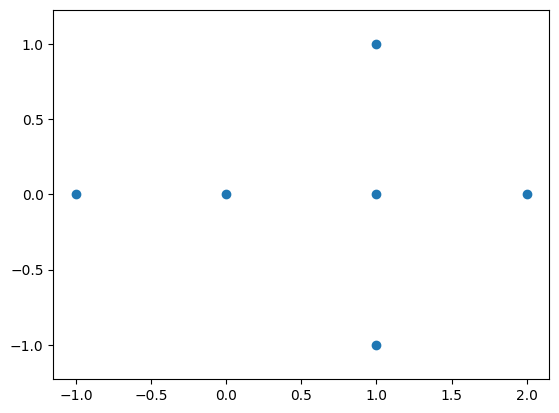

In [105]:
arrTest2 = [[0,0],[1,1],[2,0], [-1,0], [1,0], [1, -1]]
numberOfBoomerangs(arrTest2)
plt.scatter(*zip(*arrTest2))
plt.axis('equal')

In [ ]:
You are given a doubly linked list, which contains nodes that have a next pointer, a previous pointer, and an additional child pointer. This child pointer may or may not point to a separate doubly linked list, also containing these special nodes. These child lists may have one or more children of their own, and so on, to produce a multilevel data structure as shown in the example below.

Given the head of the first level of the list, flatten the list so that all the nodes appear in a single-level, doubly linked list. Let curr be a node with a child list. The nodes in the child list should appear after curr and before curr.next in the flattened list.

Return the head of the flattened list. The nodes in the list must have all of their child pointers set to null.

Example 1:

Input: head = [1,2,3,4,5,6,null,null,null,7,8,9,10,null,null,11,12]
Output: [1,2,3,7,8,11,12,9,10,4,5,6]
Explanation: The multilevel linked list in the input is shown.
After flattening the multilevel linked list it becomes:

Example 2:

Input: head = [1,2,null,3]
Output: [1,3,2]
Explanation: The multilevel linked list in the input is shown.
After flattening the multilevel linked list it becomes:

Example 3:

Input: head = []
Output: []
Explanation: There could be empty list in the input.

Constraints:

    The number of Nodes will not exceed 1000.
    1 <= Node.val <= 105

How the multilevel linked list is represented in test cases:

We use the multilevel linked list from Example 1 above:

 1---2---3---4---5---6--NULL
         |
         7---8---9---10--NULL
             |
             11--12--NULL

The serialization of each level is as follows:

[1,2,3,4,5,6,null]
[7,8,9,10,null]
[11,12,null]

To serialize all levels together, we will add nulls in each level to signify no node connects to the upper node of the previous level. The serialization becomes:

[1,    2,    3, 4, 5, 6, null]
             |
[null, null, 7,    8, 9, 10, null]
                   |
[            null, 11, 12, null]

Merging the serialization of each level and removing trailing nulls we obtain:

[1,2,3,4,5,6,null,null,null,7,8,9,10,null,null,11,12]

To resolve this exercise we need to create a linked list class in Python. 
Firstly, we create a Node class then using Node to create a linked list. A node is 
 

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

In [29]:
class LinkedList:
    def __init__(self):
        self.head = None

    def insertAtBeginning(self, value):
        new_node = Node(value)
        new_node.next = self.head
        self.head = new_node
        
    def add(self, value):
        new_node = Node(value)
        if self.head is None:
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node
            
    def addListValue(self, values):
        for value in values:
            self.add(value)
    
    def printLinkedList(self):
        values = []
        current = self.head
        while current:
            values.append(str(current.data))
            temp = current.next
        return " -> ".join(values)

1---2---3---4---5---6--NULL

In [45]:
linked_list = LinkedList()
linked_list.add(1)
linked_list.add(2)
linked_list.add(None)
linked_list.add(None)
linked_list.add(3)
linked_list.printLinkedList()


KeyboardInterrupt: 

In [38]:
linked_list2 = LinkedList()
# linked_list2.addListValue(range(3))


In [43]:
for value in [5, 6, 7]:
    linked_list2.add(value)
linked_list2.printLinkedList()

KeyboardInterrupt: 

In [47]:
linked_list3 = LinkedList()
linked_list3.insertAtBeginning(1)
linked_list3.insertAtBeginning(2)
linked_list3.printLinkedList()

KeyboardInterrupt: 

In [48]:
class Node:
    def __init__(self, val=0, prev=None, next=None, child=None):
        self.val = val
        self.prev = prev
        self.next = next
        self.child = child

def flatten(head: Node) -> Node:
    if not head:
        return head

    pseudo_head = Node(0)
    pseudo_head.next = head
    prev = pseudo_head

    stack = []
    stack.append(head)

    while stack:
        curr = stack.pop()

        # Maintain the double linked list structure
        prev.next = curr
        curr.prev = prev

        # Push next node to stack first, so we pop it last after the child
        if curr.next:
            stack.append(curr.next)
        
        # Push child node to stack to ensure it's processed before the next node
        if curr.child:
            stack.append(curr.child)
            curr.child = None  # Don't forget to unlink child pointer

        # Move the prev pointer for next iteration
        prev = curr

    # Detach pseudo head from the real head
    pseudo_head.next.prev = None
    return pseudo_head.next

def print_list(head):
    while head:
        print(head.val, end=" -> ")
        head = head.next
    print("None")

# Example Usage
head = Node(1)
head.next = Node(2)
head.next.prev = head
head.next.next = Node(3)
head.next.next.prev = head.next
head.next.next.child = Node(7)
head.next.next.child.next = Node(8)
head.next.next.child.next.prev = head.next.next.child
head.next.next.child.next.child = Node(11)
head.next.next.child.next.child.next = Node(12)
head.next.next.child.next.child.next.prev = head.next.next.child.next.child
head.next.next.child.next.next = Node(9)
head.next.next.child.next.next.prev = head.next.next.child.next
head.next.next.child.next.next.next = Node(10)
head.next.next.child.next.next.next.prev = head.next.next.child.next.next

flattened_head = flatten(head)
print_list(flattened_head)


1 -> 2 -> 3 -> 7 -> 8 -> 11 -> 12 -> 9 -> 10 -> None
